# Import Data

This dataset was obtained from the UCI Machine Learning Database and was compiled by Daniel H. Stolfi at the University of Malaga - Spain.  The original source of the data is from the Birmingham City Council government website.

https://data.birmingham.gov.uk/dataset/birmingham-parking/resource/bea04cd0-ea86-4d7e-ab3b-2da3368d1e01

https://archive.ics.uci.edu/ml/datasets/Parking+Birmingham#


+ Daniel H. Stolfi, Enrique Alba, and Xin Yao. Predicting Car Park Occupancy Rates in Smart Cities. In: Smart Cities: Second International Conference, Smart-CT 2017, MÃ¡laga, Spain, June 14-16, 2017, pp. 107â€“117. doi> 10.1007/978-3-319-59513-9_11
+ Birmingham City Council. [Web Link]



## Download Data

In [1]:
# Only needs to be run once to download the data, unless you are working on Google Colab
# uncomment below to download (For UNIX systems)

!curl https://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip --create-dirs -o  ./data/dataset.zip
!unzip -o ./data/dataset.zip -d ./data/


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  234k    0  234k    0     0   477k      0 --:--:-- --:--:-- --:--:--  476k
Archive:  ./data/dataset.zip
  inflating: ./data/dataset.csv      


# Import Data to Pandas Dataframe

In [2]:
# To download the py script
!curl https://raw.githubusercontent.com/JonSolow/Parking_TimeSeries/master/Workbook_Init.py >> Workbook_Init.py

# Import libraries and custom functions defined in Workbook_Init.py
from Workbook_Init import *


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11754  100 11754    0     0  63098      0 --:--:-- --:--:-- --:--:-- 63193


In [3]:
df_raw = pd.read_csv('/content/data/dataset.csv')

# Tranform data


In [4]:
df_raw.head(10)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48
5,BHMBCCMKT01,577,177,2016-10-04 10:26:49
6,BHMBCCMKT01,577,219,2016-10-04 10:59:48
7,BHMBCCMKT01,577,247,2016-10-04 11:25:47
8,BHMBCCMKT01,577,259,2016-10-04 11:59:44
9,BHMBCCMKT01,577,266,2016-10-04 12:29:45


In [5]:
df_raw['LastUpdated'] = pd.to_datetime(df_raw['LastUpdated'])

df_raw['LastUpdated'] = df_raw['LastUpdated'].apply(lambda x: x.replace(year=2022))

In [6]:
df_raw.head(100)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2022-10-04 07:59:42
1,BHMBCCMKT01,577,64,2022-10-04 08:25:42
2,BHMBCCMKT01,577,80,2022-10-04 08:59:42
3,BHMBCCMKT01,577,107,2022-10-04 09:32:46
4,BHMBCCMKT01,577,150,2022-10-04 09:59:48
...,...,...,...,...
95,BHMBCCMKT01,577,64,2022-10-09 10:30:43
96,BHMBCCMKT01,577,100,2022-10-09 11:04:44
97,BHMBCCMKT01,577,126,2022-10-09 11:30:41
98,BHMBCCMKT01,577,148,2022-10-09 11:57:46


## Data Inspection

In [7]:
df_raw.head(10)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2022-10-04 07:59:42
1,BHMBCCMKT01,577,64,2022-10-04 08:25:42
2,BHMBCCMKT01,577,80,2022-10-04 08:59:42
3,BHMBCCMKT01,577,107,2022-10-04 09:32:46
4,BHMBCCMKT01,577,150,2022-10-04 09:59:48
5,BHMBCCMKT01,577,177,2022-10-04 10:26:49
6,BHMBCCMKT01,577,219,2022-10-04 10:59:48
7,BHMBCCMKT01,577,247,2022-10-04 11:25:47
8,BHMBCCMKT01,577,259,2022-10-04 11:59:44
9,BHMBCCMKT01,577,266,2022-10-04 12:29:45


In [8]:
df_raw.count()

SystemCodeNumber    35717
Capacity            35717
Occupancy           35717
LastUpdated         35717
dtype: int64

Using `len()` function, we can see how many observations there are:

In [9]:
len(df_raw)

35717

In [10]:
df_raw.dtypes

SystemCodeNumber            object
Capacity                     int64
Occupancy                    int64
LastUpdated         datetime64[ns]
dtype: object

## Data Cleaning

In [11]:
df_clean = df_raw.copy()
df_clean.LastUpdated = df_clean.LastUpdated.astype('datetime64')
df_clean['PercentOccupied'] = df_clean.Occupancy / df_clean.Capacity
df_clean['date'] = df_clean.LastUpdated.dt.date
df_clean['dayofweek'] = df_clean.LastUpdated.dt.dayofweek
df_clean['date_time_halfhour'] = df_clean.LastUpdated.dt.round('30min')
df_clean['time'] = df_clean.date_time_halfhour.dt.time

<ipython-input-11-c57c67ad7b09>:2: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df_clean.LastUpdated = df_clean.LastUpdated.astype('datetime64')


In [12]:
df_clean.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,PercentOccupied,date,dayofweek,date_time_halfhour,time
0,BHMBCCMKT01,577,61,2022-10-04 07:59:42,0.105719,2022-10-04,1,2022-10-04 08:00:00,08:00:00
1,BHMBCCMKT01,577,64,2022-10-04 08:25:42,0.110919,2022-10-04,1,2022-10-04 08:30:00,08:30:00
2,BHMBCCMKT01,577,80,2022-10-04 08:59:42,0.138648,2022-10-04,1,2022-10-04 09:00:00,09:00:00
3,BHMBCCMKT01,577,107,2022-10-04 09:32:46,0.185442,2022-10-04,1,2022-10-04 09:30:00,09:30:00
4,BHMBCCMKT01,577,150,2022-10-04 09:59:48,0.259965,2022-10-04,1,2022-10-04 10:00:00,10:00:00


In [13]:
df_clean.groupby('time').size()

time
07:30:00      30
08:00:00    2096
08:30:00    1971
09:00:00    1953
09:30:00    1983
10:00:00    1987
10:30:00    1985
11:00:00    1961
11:30:00    1988
12:00:00    1976
12:30:00    1982
13:00:00    1988
13:30:00    1958
14:00:00    1984
14:30:00    1989
15:00:00    1986
15:30:00    1985
16:00:00    1956
16:30:00    1959
dtype: int64

In [14]:
df_clean = df_clean[df_clean.time > datetime.time(7,30)]

In [15]:
# drop duplicates
pre_len = len(df_clean)
df_clean = df_clean.drop_duplicates()

post_len = len(df_clean)

dropped_len = pre_len - post_len
print(dropped_len)

207


In [16]:
# Note that some values are out of range of 0-100%
print('Minimum Percent Occupied: {:.2%}'.format(df_clean.PercentOccupied.min()))
print('Maximum Percent Occupied: {:.2%}'.format(df_clean.PercentOccupied.max()))

Minimum Percent Occupied: -1.67%
Maximum Percent Occupied: 104.13%


In [17]:
# Limit Occupancy to the range of zero to Capacity
df_clean.Occupancy = df_clean.apply(lambda x: max(0, min(x['Capacity'], x['Occupancy'])), axis=1)
df_clean['PercentOccupied'] = df_clean.Occupancy / df_clean.Capacity

# Re-check range
print('Minimum Percent Occupied: {:.2%}'.format(df_clean.PercentOccupied.min()))
print('Maximum Percent Occupied: {:.2%}'.format(df_clean.PercentOccupied.max()))

Minimum Percent Occupied: 0.00%
Maximum Percent Occupied: 100.00%


Let's take a look at a few graphs for each location to see what the trend in parking occupancy rates looks like.

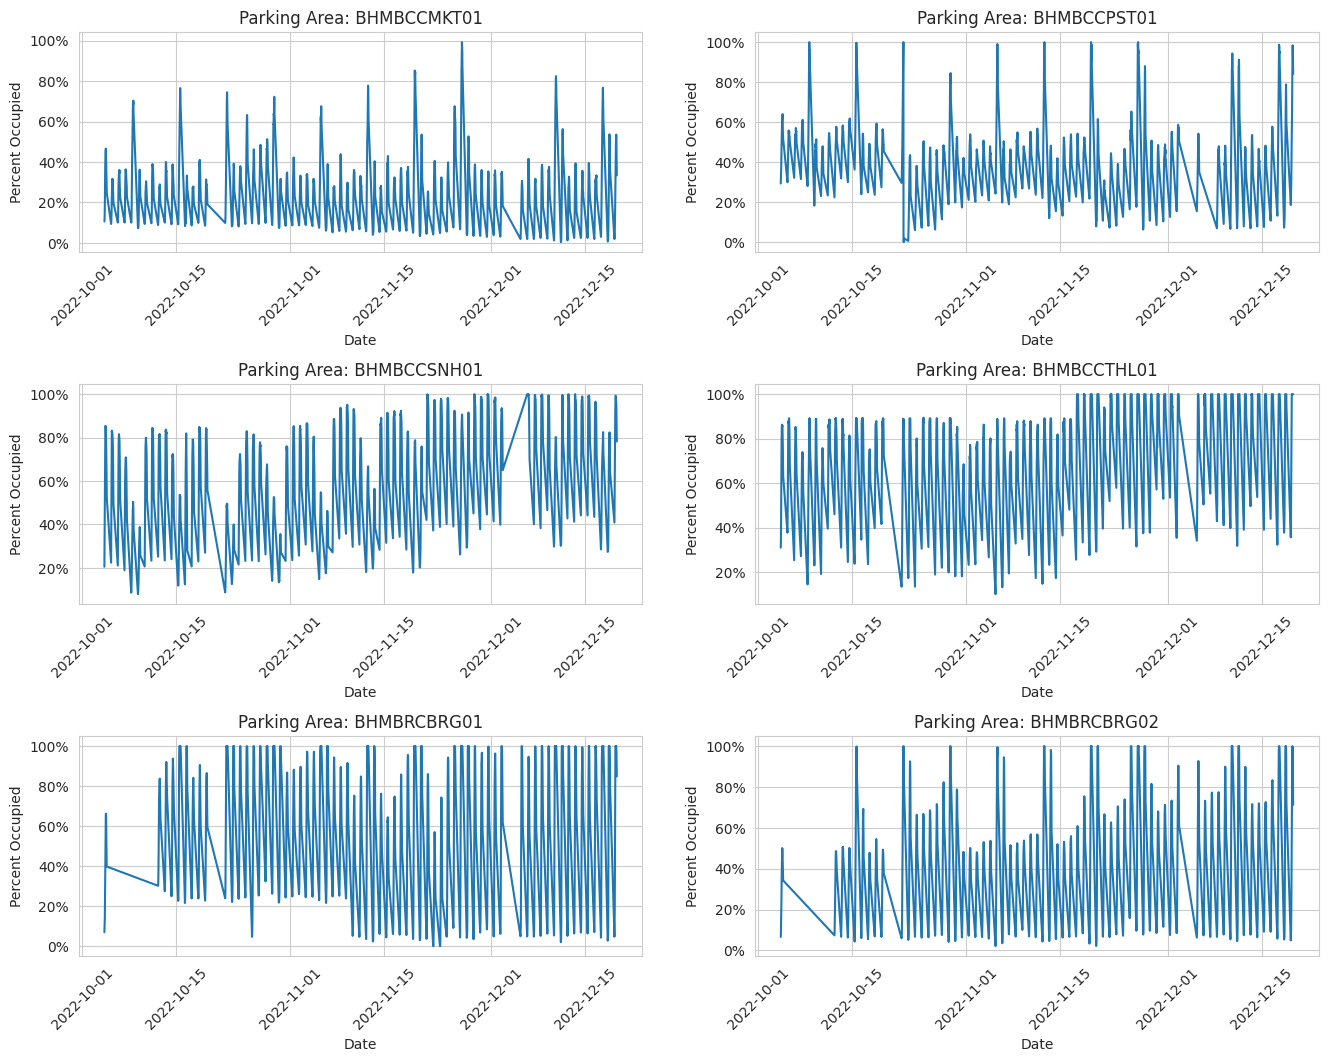

In [18]:
sample_plots_by_scn(df=df_clean, num_graphs=6, num_per_row=2)

In [19]:
df_agg_dthh = df_clean.groupby('date_time_halfhour').agg({'Occupancy':['sum','count'], 'Capacity':['sum','count']})
df_agg_dthh['PercentOccupied'] = df_agg_dthh.Occupancy['sum'] / df_agg_dthh.Capacity['sum']

In [20]:
# Check for times when we dont have a big enough sample
df_agg_dthh[(df_agg_dthh.Occupancy['count']<20)|(df_agg_dthh.Capacity['sum']<50000)]



Occupancy       Capacity       PercentOccupied
                          sum count      sum count                
date_time_halfhour                                                
2022-10-04 08:00:00      7852    28    38980    28        0.201437
2022-10-04 08:30:00      9648    28    38980    28        0.247512
2022-10-04 09:00:00     12296    28    38980    28        0.315444
2022-10-04 09:30:00     14905    28    38980    28        0.382376
2022-10-04 10:00:00     17109    28    38980    28        0.438917
...                       ...   ...      ...   ...             ...
2022-12-19 14:30:00     28169    26    36924    26        0.762891
2022-12-19 15:00:00     27571    26    36924    26        0.746696
2022-12-19 15:30:00     26545    26    36924    26        0.718909
2022-12-19 16:00:00     24662    26    36924    26        0.667912
2022-12-19 16:30:00     22879    26    36924    26        0.619624

[1309 rows x 5 columns]

In [21]:
df_agg_dthh.drop(columns=['Occupancy', 'Capacity'], inplace=True)
df_agg_dthh.drop([pd.Timestamp('2022-10-28 08:00:00'), pd.Timestamp('2022-12-13 13:30:00')], inplace=True)

In [22]:
df_agg_dthh.head()

,PercentOccupied
,
date_time_halfhour,
2022-10-04 08:00:00,0.201437
2022-10-04 08:30:00,0.247512
2022-10-04 09:00:00,0.315444
2022-10-04 09:30:00,0.382376
2022-10-04 10:00:00,0.438917


The temporary dataframe below is used to inspect for more missing times.  The ARIMA and SARIMA models will require having every time filled in.

In [23]:
df_agg_dthh.dtypes

PercentOccupied      float64
dtype: object

In [24]:
df_agg_dthh.head(50)

,PercentOccupied
,
date_time_halfhour,
2022-10-04 08:00:00,0.201437
2022-10-04 08:30:00,0.247512
2022-10-04 09:00:00,0.315444
2022-10-04 09:30:00,0.382376
2022-10-04 10:00:00,0.438917
2022-10-04 10:30:00,0.484684
2022-10-04 11:00:00,0.530015
2022-10-04 11:30:00,0.548390


In [25]:
temp = df_agg_dthh.reset_index()
temp['date'] = temp.date_time_halfhour.dt.date
temp['time'] = temp.date_time_halfhour.dt.time
temp = temp.groupby('date').count()

# Replace the year in the 'Date' column
# temp['date'] = temp['date'].apply(lambda x: x.replace(year=2023))

temp = pd.DataFrame(temp, index=pd.date_range('2022-10-04', '2022-12-19')).fillna(0)
temp[temp.date_time_halfhour<18]


# temp = df_agg_dthh.reset_index()
# temp['date'] = temp.date_time_halfhour.dt.date
# temp['time'] = temp.date_time_halfhour.dt.time

# # Group by 'date' and perform the count
# temp = temp.groupby('date').count()

# # Replace the year in the 'date' index
# temp.index = temp.index.map(lambda x: x.replace(year=2023))

# # Create a new DataFrame with a complete date range and fill NaN values with 0
# temp = pd.DataFrame(temp['time'], index=pd.date_range('2016-10-04', '2016-12-19')).fillna(0)

# # Filter rows where 'date_time_halfhour' is less than 18
# temp[temp.index.hour < 18]
# All of 10/20 and 10/21 are missing
# 10/30 missing 16:00 and 16:30
# 11/18 missing 9:00
# 11/25 missing 8:30
# 12/14 missing 11:00

# 10/28 and 12/13 dropped times as noted above

<ipython-input-25-ffd92e5bbe42>:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  temp = temp.groupby('date').count()


,date_time_halfhour,PercentOccupied,time
,,,
2016-10-04,0.0,0.0,0.0
2016-10-05,0.0,0.0,0.0
2016-10-06,0.0,0.0,0.0
2016-10-07,0.0,0.0,0.0
2016-10-08,0.0,0.0,0.0
...,...,...,...
2016-12-15,0.0,0.0,0.0
2016-12-16,0.0,0.0,0.0
2016-12-17,0.0,0.0,0.0


This function fills in the time with the occupancy at the same time from one week earlier, based on our knowledge that people tend to do things on a weekly basis.

In [26]:
def fill_with_week_prior(df, column, year, month, day, hour, minutes):
  df.loc[pd.to_datetime(datetime.datetime(year, month, day, hour, minutes)), column] = \
      df.loc[pd.to_datetime(datetime.datetime(year, month, day, hour, minutes) + timedelta(days=-7)), column].values[0]


In [27]:
df_agg_dthh['PercentOccupied']
# df_agg_dthh.dtypes

date_time_halfhour
2022-10-04 08:00:00    0.201437
2022-10-04 08:30:00    0.247512
2022-10-04 09:00:00    0.315444
2022-10-04 09:30:00    0.382376
2022-10-04 10:00:00    0.438917
                         ...   
2022-12-19 14:30:00    0.762891
2022-12-19 15:00:00    0.746696
2022-12-19 15:30:00    0.718909
2022-12-19 16:00:00    0.667912
2022-12-19 16:30:00    0.619624
Name: PercentOccupied, Length: 1307, dtype: float64

In [28]:
# # Convert 'Date_Time' to datetime format
# df_agg_dthh['date_time_halfhour'] = pd.to_datetime(df_agg_dthh['date_time_halfhour'])

# # Replace the year with 2022
# df_agg_dthh['date_time_halfhour'] = df_agg_dthh['date_time_halfhour'].apply(lambda x: x.replace(year=2022))

In [29]:
# fill in missing Percent Occupied with prior week's value for same time

# Also fill in for the under-reported times noted above

df_agg_fillmissing = df_agg_dthh.copy()


# all day loop
for hour in range(8, 17):
  for half_hour in [0, 30]:
    fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2022, 10, 20, hour, half_hour)
    fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2022, 10, 21, hour, half_hour)
    fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2022, 12, 3, hour, half_hour)
    fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2022, 12, 4, hour, half_hour)

# fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2022, 10, 20, 8, 0)
# fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2022, 10, 21, 8, 0)
fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2022, 10, 30, 16, 0)
fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2022, 10, 30, 16, 30)
fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2022, 11, 18, 9, 0)
fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2022, 11, 25, 8, 30)
fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2022, 12, 14, 11, 0)
fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2022, 10, 28, 8, 0)
fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2022, 12, 13, 13, 30)

df_agg_fillmissing.sort_index(inplace=True)

Now we check to make sure that there are 18 times for each day.  The following code should return an empty series.

In [30]:

temp = pd.Series(df_agg_fillmissing.index.date).value_counts()
temp[temp<18]

Series([], dtype: int64)

Let's take another look to see that we don't have any more gaps in the data.

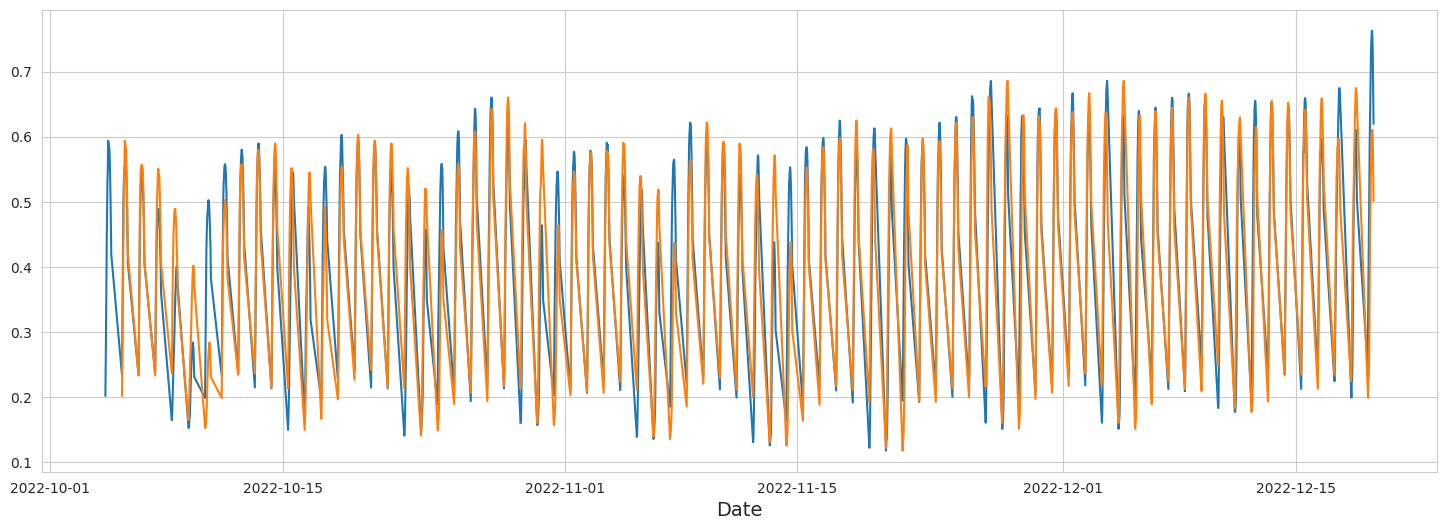

In [31]:
plt.figure(figsize=(18,6))
plt.plot(df_agg_fillmissing)
plt.plot(df_agg_fillmissing.shift(18))
plt.xlabel('Date', fontsize=14);

# Look for Seasonality and Test for Stationarity

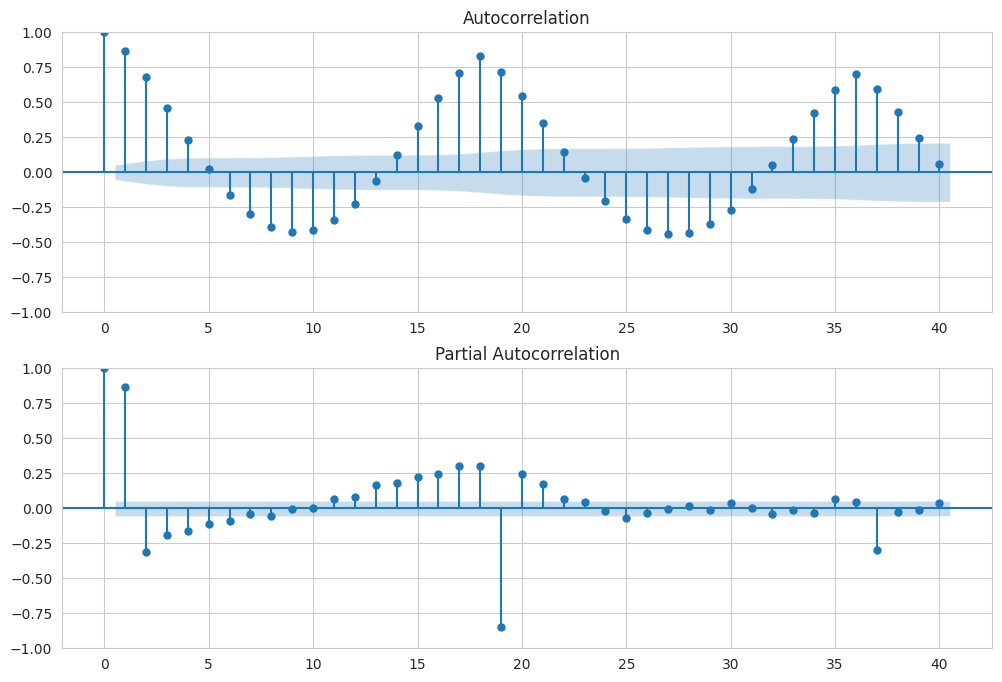

In [32]:
subplots_acf_pacf(df_agg_fillmissing)

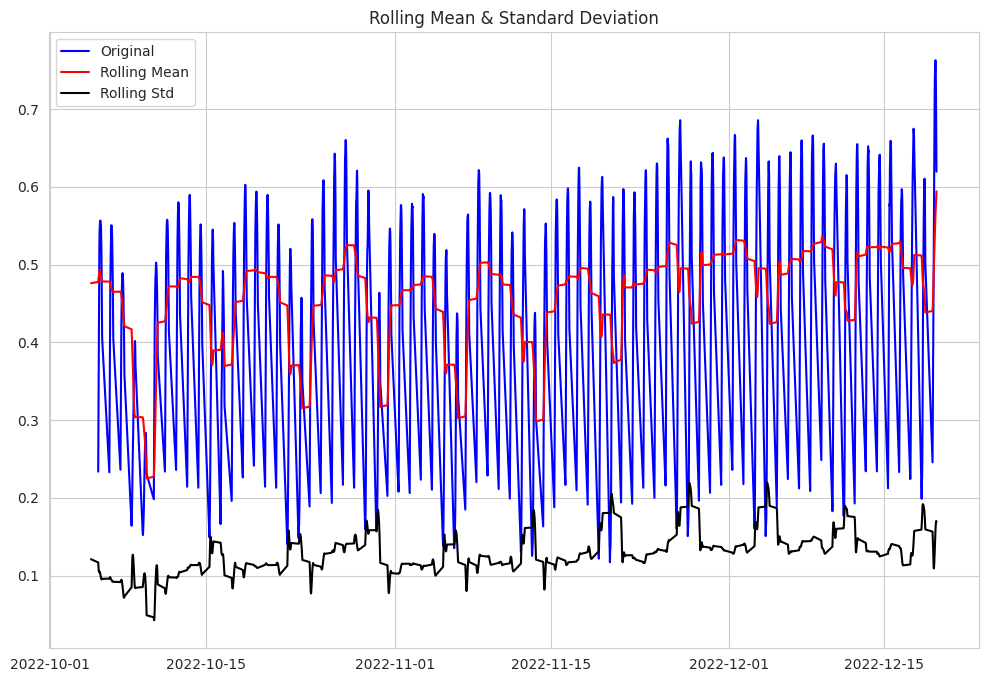

Results of Dickey-Fuller Test:
Test Statistic                   -4.028499
p-value                           0.001268
#Lags Used                       24.000000
Number of Observations Used    1361.000000
Critical Value (1%)              -3.435164
Critical Value (5%)              -2.863666
Critical Value (10%)             -2.567902
dtype: float64


In [33]:
test_stationarity(df_agg_fillmissing.squeeze(), 18)

To try to make the data more stationary, the difference below aim to make the endogenous variable the change in occupancy for each time between each day.  It then uses a period of 7 to compare each of those differences each week.

The resulting data is very stationary.  The p-value (which is essentially the probability of seeing this stationarity by random chance) is incredibly low.

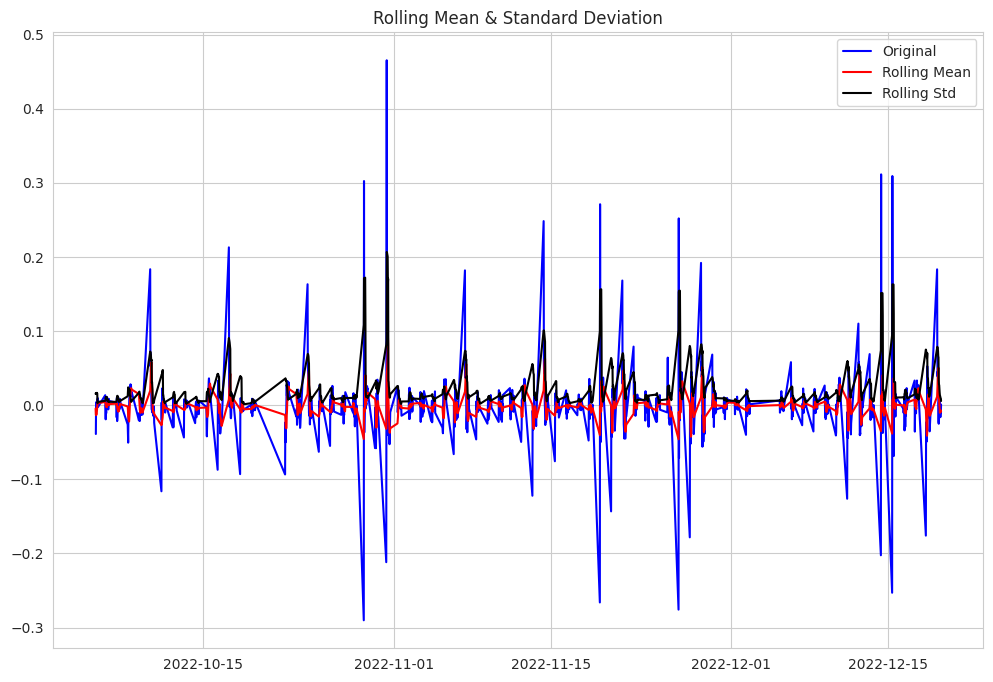

Results of Dickey-Fuller Test:
Test Statistic                -1.407532e+01
p-value                        2.891728e-26
#Lags Used                     1.900000e+01
Number of Observations Used    1.268000e+03
Critical Value (1%)           -3.435518e+00
Critical Value (5%)           -2.863822e+00
Critical Value (10%)          -2.567985e+00
dtype: float64


In [34]:
test_stationarity(df_agg_dthh.diff(18).diff().dropna().squeeze(), 7)

# Split data to train and test the Models

The train-test split used in this case is a TimeSeriesSplit, which uses a cutoff date.  All data prior to that date is training, and everything after is testing.

In [35]:
# Train-Test Split
# Sklearn built in split for time series

from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
print(tscv)


data_use = df_agg_fillmissing.reset_index()['PercentOccupied']

for train_index, test_index in tscv.split(data_use):
  train = data_use[train_index]
  test = data_use[test_index]


TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


We can check that the time split worked properly by making sure that the end of the training data lines up with the beginning of the test data.

In [36]:
train.index = df_agg_fillmissing.index[:len(train)]
train.tail()

date_time_halfhour
2022-12-06 16:00:00    0.505548
2022-12-06 16:30:00    0.458811
2022-12-07 08:00:00    0.212089
2022-12-07 08:30:00    0.256110
2022-12-07 09:00:00    0.310685
Name: PercentOccupied, dtype: float64

In [37]:
test.index = df_agg_fillmissing.index[len(train):]
test.head()

date_time_halfhour
2022-12-07 09:30:00    0.368854
2022-12-07 10:00:00    0.438171
2022-12-07 10:30:00    0.494762
2022-12-07 11:00:00    0.557329
2022-12-07 11:30:00    0.589452
Name: PercentOccupied, dtype: float64

# SARIMA Model

The model below reflects the seasonality of the occupancy rates.  The difference here is that a seasonal order is applied such that the 18 period-day is reflected.

This model is able to run much more quickly (about 30 seconds on google colab).

In [38]:
%%time
# Define and fit SARIMA model
my_seasonal_order = (1, 1, 1, 18)
sarima_model = SARIMAX(train, order=(1, 0, 1), seasonal_order=my_seasonal_order)
results_SAR = sarima_model.fit(disp=-1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


CPU times: user 7.34 s, sys: 4.93 s, total: 12.3 s
Wall time: 6.82 s


We can see that the model seems to fit the actual data much more closely.  The metrics also show this:
* Explained Variance - increased to 85.8%
* Mean Absolute Error - decreased to 4.9%

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


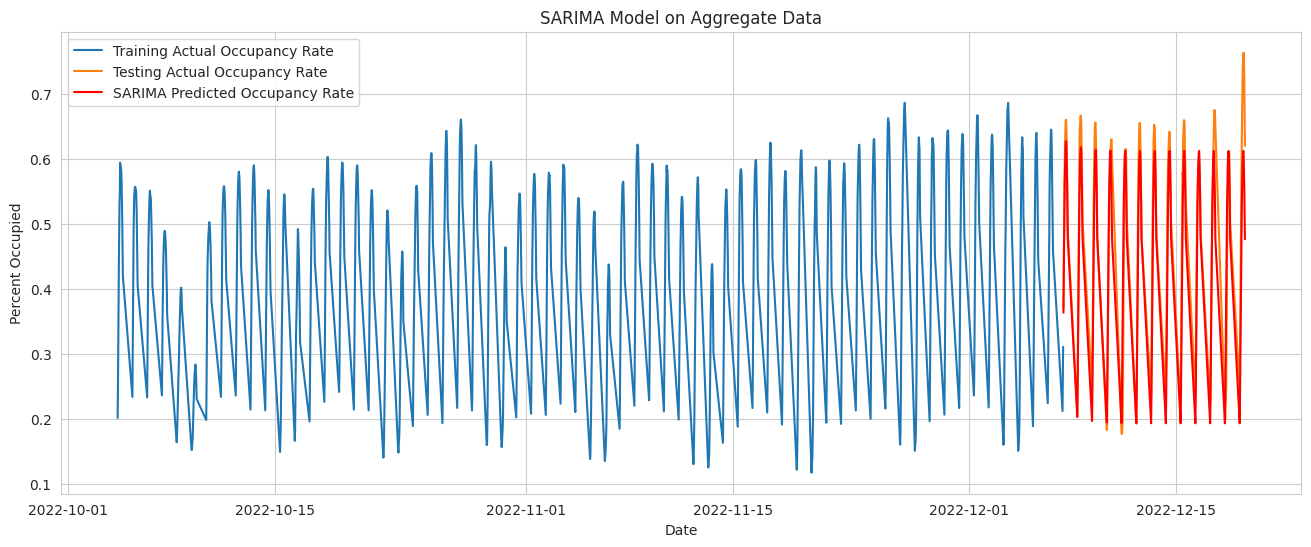

-----------------------------------------------------------------------------
SARIMA Model Metrics on Test Data
Explained Variance:
	 0.8579952590565098
MAE:
	 0.04905387785245523


In [39]:
plt.figure(figsize=(16,6))
plt.title('SARIMA Model on Aggregate Data')
plt.plot(train, label='Training Actual Occupancy Rate')
plt.xlabel('Date')
plt.ylabel('Percent Occupied')
y_pred_sar = pd.Series(results_SAR.forecast(steps=len(test)).values, index=test.index)
plt.plot(test, label='Testing Actual Occupancy Rate')
plt.plot(y_pred_sar, color='red', label='SARIMA Predicted Occupancy Rate')
plt.legend()

plt.show()


print('-'*77)
print('SARIMA Model Metrics on Test Data')
print('='*77)
report_metrics(test.squeeze(), y_pred_sar.squeeze())

# Model Comparison

We can take a look at how the actual predicted occupancy rates compare in the pandas dataframe below.

In [40]:
df_SAR_results = pd.DataFrame(list(zip(test.index, y_pred_sar, test, y_pred_sar-test)), columns=['Date_Time', 'Predicted', 'Actual', 'Difference'])
# df_SAR_results.to_csv("SARIMA DATA.csv")
df_SAR_results['Absolute_Diff'] = np.abs(df_SAR_results.Difference)
df_SAR_results.sort_values('Absolute_Diff', ascending=False)

,Date_Time,Predicted,Actual,Difference,Absolute_Diff
74,2022-12-11 10:30:00,0.440250,0.266308,0.173942,0.173942
194,2022-12-17 16:30:00,0.476124,0.647990,-0.171867,0.171867
73,2022-12-11 10:00:00,0.388566,0.219690,0.168875,0.168875
227,2022-12-19 15:00:00,0.580703,0.746696,-0.165993,0.165993
228,2022-12-19 15:30:00,0.554743,0.718909,-0.164166,0.164166
...,...,...,...,...,...
104,2022-12-12 16:30:00,0.476146,0.477758,-0.001611,0.001611
63,2022-12-10 14:00:00,0.612503,0.613918,-0.001415,0.001415
87,2022-12-12 08:00:00,0.193315,0.192811,0.000504,0.000504
168,2022-12-16 12:30:00,0.583883,0.583848,0.000034,0.000034


This plot zooms in on the testing period and has the predictions from both models.  We can see that the SARIMA model fits much more closely to reality.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


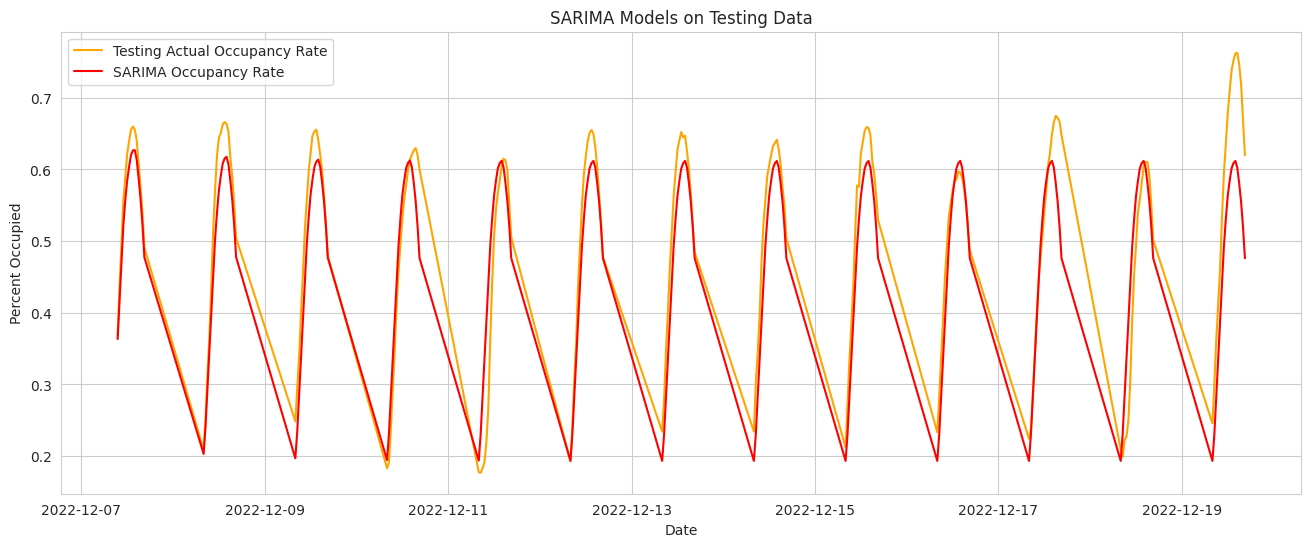

-----------------------------------------------------------------------------
SARIMA Model Metrics on Test Data
Explained Variance:
	 0.8579952590565098
MAE:
	 0.04905387785245523


In [41]:
plt.figure(figsize=(16,6))
plt.title('SARIMA Models on Testing Data')
plt.xlabel('Date')
plt.ylabel('Percent Occupied')
y_pred_sar = pd.Series(results_SAR.forecast(steps=len(test)).values, index=test.index)
plt.plot(test, label='Testing Actual Occupancy Rate', color='orange')
plt.plot(y_pred_sar, color='red', label='SARIMA Occupancy Rate')

# y_pred_AR = pd.Series(results_AR.forecast(steps=len(test))[0], index=test.index)
# plt.plot(y_pred_AR, color='purple', label='ARIMA Occupancy Rate')

plt.legend()

plt.show()
print('-'*77)
print('SARIMA Model Metrics on Test Data')
print('='*77)
report_metrics(test.squeeze(), y_pred_sar.squeeze())

